In [62]:
# Dependencies
import json
import pandas as pd
import numpy as np
import csv
import requests
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from  textblob import TextBlob
import matplotlib.pyplot as plt
import datetime


# # Twitter API Keys 
# consumer_key = "yUHOWwWG9Pj3C8f21tnm4rWOb"
# consumer_secret = "JowHOFRinCn2DOOd7ZP8ToHkU83piXhZ0ZPUopHTW7grDS0XPI"
# access_token = "975055841089867776-GRHdjTQ4NuqwZNfevh4L54bxNgiw1Hu"
# access_token_secret = "nR7n7Qp5lduLHCH6rSF46gJi8YolN6pRLXnE63lghWc3T"



In [2]:
# # Setup Tweepy API Authentication
# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_token_secret)
# api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

# # Get all tweets from home feed
# public_tweets = api.home_timeline()

# Import CSV file into Data Frame
tweeter_data = pd.read_csv("Output_tweeter_bitcoin.csv", dtype=str)

tweeter_data.head()
# len(df_tweeter_data)

,Unnamed: 0,date,favorites,geo,hashtags,id,retweets,text,username,keyword
0,0,2018-01-29 15:59:59,4,NaN,#Lunyr #LUN #Ethereum #Bitcoin #Blockchain,958127616095080449,0,Which universities would you like to work with...,OpenEthereum,btc
1,1,2018-01-29 15:59:58,0,NaN,#Criptomonedas #Bitcoin #Venezuela,958127610860580864,0,El Fabuloso Mundo de las #Criptomonedas #Bitco...,coincox,btc
2,2,2018-01-29 15:59:55,0,NaN,NaN,958127597577297920,0,Porque Podemos Fabricar Bitcoin con la mineria...,luisgodelavega,btc
3,3,2018-01-29 15:59:54,1,NaN,NaN,958127593412182016,0,Sign up for Robinhood to invest in Bitcoin and...,devdathug,btc
4,4,2018-01-29 15:59:52,0,NaN,NaN,958127588039450624,0,Bitcoin,RaenPiedmont,btc


In [3]:
df_tweeter_data = pd.DataFrame(tweeter_data)
df_tweeter_data.head()

,Unnamed: 0,date,favorites,geo,hashtags,id,retweets,text,username,keyword
0,0,2018-01-29 15:59:59,4,NaN,#Lunyr #LUN #Ethereum #Bitcoin #Blockchain,958127616095080449,0,Which universities would you like to work with...,OpenEthereum,btc
1,1,2018-01-29 15:59:58,0,NaN,#Criptomonedas #Bitcoin #Venezuela,958127610860580864,0,El Fabuloso Mundo de las #Criptomonedas #Bitco...,coincox,btc
2,2,2018-01-29 15:59:55,0,NaN,NaN,958127597577297920,0,Porque Podemos Fabricar Bitcoin con la mineria...,luisgodelavega,btc
3,3,2018-01-29 15:59:54,1,NaN,NaN,958127593412182016,0,Sign up for Robinhood to invest in Bitcoin and...,devdathug,btc
4,4,2018-01-29 15:59:52,0,NaN,NaN,958127588039450624,0,Bitcoin,RaenPiedmont,btc


In [4]:
columns = ['date','text','username','keyword']
df1_tweeter_data = pd.DataFrame(df_tweeter_data, columns=columns)
df1_tweeter_data.head()

,date,text,username,keyword
0,2018-01-29 15:59:59,Which universities would you like to work with...,OpenEthereum,btc
1,2018-01-29 15:59:58,El Fabuloso Mundo de las #Criptomonedas #Bitco...,coincox,btc
2,2018-01-29 15:59:55,Porque Podemos Fabricar Bitcoin con la mineria...,luisgodelavega,btc
3,2018-01-29 15:59:54,Sign up for Robinhood to invest in Bitcoin and...,devdathug,btc
4,2018-01-29 15:59:52,Bitcoin,RaenPiedmont,btc


In [5]:
len(df1_tweeter_data)

55800

In [6]:
df2_tweeter_data = df1_tweeter_data.drop_duplicates(["text","username"])
len(df2_tweeter_data)

9054

In [7]:
df2_tweeter_data=df2_tweeter_data.fillna('')

In [8]:
# Search for all tweets
tweets_text = df2_tweeter_data["text"]

# counter = 0
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
all_tweets = []

for tweet in tweets_text:
    if type(tweet) is str:
#     all_tweets.append(tweet)
#     tx= TextBlob(t)
#     counter+=1
#     print(counter)
#     print(tweet)
    
        compound = analyzer.polarity_scores(tweet)["compound"]
#         print(compound)
        pos = analyzer.polarity_scores(tweet)["pos"]
        neu = analyzer.polarity_scores(tweet)["neu"]
        neg = analyzer.polarity_scores(tweet)["neg"]
    
# # # Add each value to the appropriate list
        compound_list.append(compound)
        positive_list.append(pos)
        negative_list.append(neg)
        neutral_list.append(neu)
    
# # # Print the Averages
# print(compound_list)
print(len(compound_list))
# print(*************)
# print("+ve" + str(positive_list))
print(np.mean(positive_list))
print(len(negative_list))
print(len(neutral_list))
# print("-ve" + str(negative_list))
# print("neutral" + str(neutral_list))    
    
# # len(tweets_text)

9054
0.06979544952507179
9054
9054


In [9]:
import numpy as np
test = np.array(compound_list)

In [10]:
len(test)

9054

In [11]:
df2_tweeter_data["Compound_score"] = compound_list

In [12]:
df2_tweeter_data["Positive_score"] = positive_list

In [13]:
df2_tweeter_data["Negative_score"] = negative_list

In [14]:
df2_tweeter_data.head(5)

,date,text,username,keyword,Compound_score,Positive_score,Negative_score
0,2018-01-29 15:59:59,Which universities would you like to work with...,OpenEthereum,btc,0.3612,0.135,0.0
1,2018-01-29 15:59:58,El Fabuloso Mundo de las #Criptomonedas #Bitco...,coincox,btc,0.0000,0.000,0.0
2,2018-01-29 15:59:55,Porque Podemos Fabricar Bitcoin con la mineria...,luisgodelavega,btc,0.0000,0.000,0.0
3,2018-01-29 15:59:54,Sign up for Robinhood to invest in Bitcoin and...,devdathug,btc,0.7263,0.225,0.0
4,2018-01-29 15:59:52,Bitcoin,RaenPiedmont,btc,0.0000,0.000,0.0


In [15]:
df_tweeter_scores = pd.DataFrame({'pos':positive_list, 'neg':negative_list, 'neutral':neutral_list})
df_tweeter_scores.head()

,neg,neutral,pos
0,0.0,0.865,0.135
1,0.0,1.000,0.000
2,0.0,1.000,0.000
3,0.0,0.775,0.225
4,0.0,1.000,0.000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A995CBA5C0>,
      dtype=object)

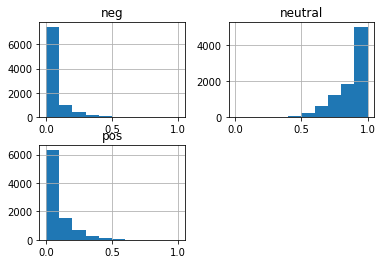

In [81]:
df_tweeter_scores.hist()

In [ ]:
# plt.bar(df2_tweeter_data['date'], df2_tweeter_data['Compound_score'],width = 0.2)

In [82]:
plt.savefig('Histogram chart of Scores',dpi=300)

In [21]:

df2_tweeter_data['date'] = pd.to_datetime(df2_tweeter_data['date']).dt.date
df2_tweeter_data.head()

,date,text,username,keyword,Compound_score,Positive_score,Negative_score
0,2018-01-29,Which universities would you like to work with...,OpenEthereum,btc,0.3612,0.135,0.0
1,2018-01-29,El Fabuloso Mundo de las #Criptomonedas #Bitco...,coincox,btc,0.0000,0.000,0.0
2,2018-01-29,Porque Podemos Fabricar Bitcoin con la mineria...,luisgodelavega,btc,0.0000,0.000,0.0
3,2018-01-29,Sign up for Robinhood to invest in Bitcoin and...,devdathug,btc,0.7263,0.225,0.0
4,2018-01-29,Bitcoin,RaenPiedmont,btc,0.0000,0.000,0.0


In [34]:
df3_tweeter_data = pd.DataFrame(df2_tweeter_data.groupby(['date'])['Compound_score'].mean().reset_index())

In [35]:
df3_tweeter_data.head()

,date,Compound_score
0,2018-01-01,0.048901
1,2018-01-02,0.088920
2,2018-01-03,0.055328
3,2018-01-04,0.065462
4,2018-01-05,0.062515


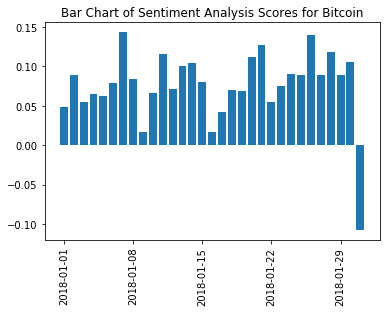

In [93]:
plt.bar(df3_tweeter_data['date'], df3_tweeter_data['Compound_score'])
plt.xticks(rotation=90)
plt.title("Bar Chart of Sentiment Analysis Scores for Bitcoin")
plt.savefig('fig1.png', dpi = 300)

In [58]:

def daily_price_historical(symbol, comparison_symbol, all_data=True, limit=1, aggregate=1, exchange=''):
    url = 'https://min-api.cryptocompare.com/data/histoday?fsym={}&tsym={}&limit={}&aggregate={}'\
            .format(symbol.upper(), comparison_symbol.upper(), limit, aggregate)
    if exchange:
        url += '&e={}'.format(exchange)
    if all_data:
        url += '&allData=true'
    page = requests.get(url)
    data = page.json()['Data']
    df = pd.DataFrame(data)
    df['timestamp'] = [datetime.datetime.fromtimestamp(d) for d in df.time]
    return df

In [71]:
df = daily_price_historical('BTC', 'USD')
print('Max length = %s' % len(df))
print('Max time = %s' % (df.timestamp.max() -df.timestamp.min()))


df_jan = df[df.timestamp>'20180101'][df.timestamp<'20180201']
df_jan["change"] = df_jan['open'] - df_jan['close']
df_jan['percentage_change'] = df_jan['change']/df_jan['open']*100
df_jan.head()

Max length = 2821
Max time = 2820 days 00:00:00


C:\Users\hbhanushali\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,close,high,low,open,time,volumefrom,volumeto,timestamp,change,percentage_change
2726,14754.13,15306.13,12934.16,13444.88,1514851200,137732.17,1.956783e+09,2018-01-01 16:00:00,-1309.25,-9.737908
2727,15156.62,15435.01,14579.71,14754.09,1514937600,106543.39,1.604207e+09,2018-01-02 16:00:00,-402.53,-2.728260
2728,15180.08,15408.66,14244.67,15156.49,1515024000,110968.82,1.656715e+09,2018-01-03 16:00:00,-23.59,-0.155643
2729,16954.78,17126.95,14832.36,15180.08,1515110400,141960.42,2.283989e+09,2018-01-04 16:00:00,-1774.70,-11.690979
2730,17172.30,17252.85,16286.57,16954.76,1515196800,83927.99,1.412704e+09,2018-01-05 16:00:00,-217.54,-1.283062


In [84]:
df_jan['date'] = pd.to_datetime(df_jan['timestamp']).dt.date
df_jan.head()

,close,high,low,open,time,volumefrom,volumeto,timestamp,change,percentage_change,date
2726,14754.13,15306.13,12934.16,13444.88,1514851200,137732.17,1.956783e+09,2018-01-01 16:00:00,-1309.25,-9.737908,2018-01-01
2727,15156.62,15435.01,14579.71,14754.09,1514937600,106543.39,1.604207e+09,2018-01-02 16:00:00,-402.53,-2.728260,2018-01-02
2728,15180.08,15408.66,14244.67,15156.49,1515024000,110968.82,1.656715e+09,2018-01-03 16:00:00,-23.59,-0.155643,2018-01-03
2729,16954.78,17126.95,14832.36,15180.08,1515110400,141960.42,2.283989e+09,2018-01-04 16:00:00,-1774.70,-11.690979,2018-01-04
2730,17172.30,17252.85,16286.57,16954.76,1515196800,83927.99,1.412704e+09,2018-01-05 16:00:00,-217.54,-1.283062,2018-01-05


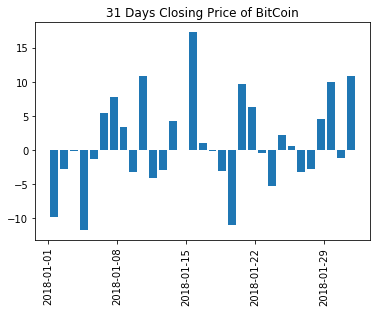

In [85]:
#plt.plot(df.timestamp, df.close)
plt.bar(df_jan.timestamp, df_jan.percentage_change)
plt.title("31 Days Closing Price of BitCoin")
plt.xticks(rotation=90)
plt.savefig('BTC_price_January.png',dpi=300)

In [86]:
df_jan_bitcoin_frame2 = pd.DataFrame(df_jan.groupby(['date'])['percentage_change'].mean().reset_index())

In [87]:
df_jan_bitcoin_frame2.head()

,date,percentage_change
0,2018-01-01,-9.737908
1,2018-01-02,-2.728260
2,2018-01-03,-0.155643
3,2018-01-04,-11.690979
4,2018-01-05,-1.283062


In [ ]:
# merging the data frames 

In [88]:
combined_df = pd.merge(df3_tweeter_data, df_jan_bitcoin_frame2, how="outer", on="date")

In [90]:
combined_df.head()

,date,Compound_score,percentage_change
0,2018-01-01,0.048901,-9.737908
1,2018-01-02,0.088920,-2.728260
2,2018-01-03,0.055328,-0.155643
3,2018-01-04,0.065462,-11.690979
4,2018-01-05,0.062515,-1.283062


In [96]:
# Finding the corelation

In [119]:
combined_df['Compound_score'].corr(combined_df['percentage_change'])

-0.015910278909093075

In [100]:
combined_df.corr()

,Compound_score,percentage_change
Compound_score,1.00000,-0.01591
percentage_change,-0.01591,1.00000


In [101]:
combined_df.head()

,date,Compound_score,percentage_change
0,2018-01-01,0.048901,-9.737908
1,2018-01-02,0.088920,-2.728260
2,2018-01-03,0.055328,-0.155643
3,2018-01-04,0.065462,-11.690979
4,2018-01-05,0.062515,-1.283062


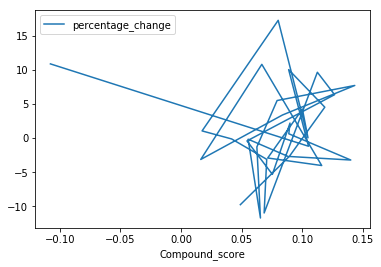

In [124]:
combined_df.plot(x='Compound_score', y='percentage_change')
combined_df["Compound_score_100"] = combined_df["Compound_score"]*100 

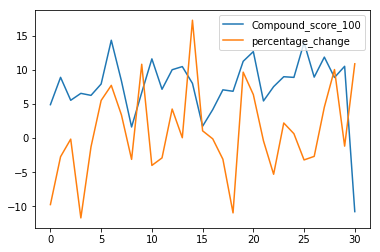

In [120]:
fig = plt.figure()
ax = plt.subplot(111)
combined_df['Compound_score_100'].plot(ax=ax)
combined_df['percentage_change'].plot(ax=ax)
plt.legend()
plt.savefig('Corelation',dpi=300)


In [9]:
# wordlist=pd.DataFrame();

# polarity=[]
# subj=[]


# def sentiment_calc(text):
#     try:
#         return TextBlob(text).sentiment
#     except:
#         return None

# df2_tweeter_data['sentiment'] = df2_tweeter_data['text'].apply(sentiment_calc)
# # for t in df2_tweeter_data["text"]:
# #     tx= TextBlob(t)
# #     polarity.append(tx.sentiment.polarity)
# #     subj.append(tx.sentiment.subjectivity)

# # poltweet= pd.DataFrame({'polarity':polarity,'subjectivity':subj})
# # poltweet.polarity.plot(title='Polarity')
# # plt.show()

C:\Users\hbhanushali\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [30]:
df2_tweeter_data.head(5)

,date,text,username,keyword,sentiment
0,2018-01-29 15:59:59,Which universities would you like to work with...,OpenEthereum,btc,"(0.0, 0.0)"
1,2018-01-29 15:59:58,El Fabuloso Mundo de las #Criptomonedas #Bitco...,coincox,btc,"(0.0, 0.0)"
2,2018-01-29 15:59:55,Porque Podemos Fabricar Bitcoin con la mineria...,luisgodelavega,btc,"(0.0, 0.0)"
3,2018-01-29 15:59:54,Sign up for Robinhood to invest in Bitcoin and...,devdathug,btc,"(0.5, 0.8)"
4,2018-01-29 15:59:52,Bitcoin,RaenPiedmont,btc,"(0.0, 0.0)"
